In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

# These becuase we have many features, and we want to display all of them
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)

plt.rcParams["figure.figsize"] = (7, 4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/MLD_Pro/final_scout_not_dummy.csv")
df

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15911,Renault Espace,Van,39885,VAT deductible,9900.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400
15912,Renault Espace,Van,39875,VAT deductible,15.000,Pre-registered,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,146.000,1,Metallic,Part/Full Leather,Automatic,1997.000,1734.000,front,5.300
15913,Renault Espace,Van,39700,VAT deductible,10.000,Pre-registered,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [5]:
df.describe(include="O").T

,count,unique,top,freq
make_model,15915,9,Audi A3,3097
body_type,15915,8,Sedans,8004
vat,15915,2,VAT deductible,15044
Type,15915,5,Used,11095
Fuel,15915,4,Benzine,8548
Comfort_Convenience,15915,6196,"Air conditioning,Electrical side mirrors,Hill ...",388
Entertainment_Media,15915,346,"Bluetooth,Hands-free equipment,On-board comput...",1737
Extras,15915,659,Alloy wheels,5785
Safety_Security,15915,4442,"ABS,Central door lock,Daytime running lights,D...",729
Paint_Type,15915,3,Metallic,15246


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.000,18024.381,7381.679,4950.000,12850.000,16900.000,21900.000,74600.000
km,15915.000,32089.996,36977.215,0.000,1920.500,20413.000,46900.000,317000.000
Gears,15915.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15915.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Previous_Owners,15915.000,1.043,0.339,0.000,1.000,1.000,1.000,4.000
hp_kW,15915.000,88.499,26.674,40.000,66.000,85.000,103.000,294.000
Inspection_new,15915.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
Displacement_cc,15915.000,1428.662,275.804,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,15915.000,1337.701,199.682,840.000,1165.000,1295.000,1472.000,2471.000
cons_comb,15915.000,4.832,0.868,3.000,4.100,4.800,5.400,9.100


In [7]:
# Check duplicates
df.duplicated().sum()

1673

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [10]:
#df.dropna(inplace=True)

## EDA

In [11]:
#Check Multicollinearity
df.corr(numeric_only= True)

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
price,1.000,-0.402,0.528,-0.481,-0.149,0.698,0.003,0.287,0.460,0.274
km,-0.402,1.000,-0.038,0.749,0.159,0.013,-0.036,0.306,0.153,-0.295
Gears,0.528,-0.038,1.000,-0.079,-0.037,0.451,-0.006,0.338,0.332,0.007
age,-0.481,0.749,-0.079,1.000,0.314,-0.093,-0.024,0.198,0.061,-0.339
Previous_Owners,-0.149,0.159,-0.037,0.314,1.000,-0.032,0.037,0.030,0.004,-0.033
hp_kW,0.698,0.013,0.451,-0.093,-0.032,1.000,0.045,0.606,0.641,0.391
Inspection_new,0.003,-0.036,-0.006,-0.024,0.037,0.045,1.000,-0.024,-0.041,0.142
Displacement_cc,0.287,0.306,0.338,0.198,0.030,0.606,-0.024,1.000,0.567,0.055
Weight_kg,0.460,0.153,0.332,0.061,0.004,0.641,-0.041,0.567,1.000,0.089
cons_comb,0.274,-0.295,0.007,-0.339,-0.033,0.391,0.142,0.055,0.089,1.000


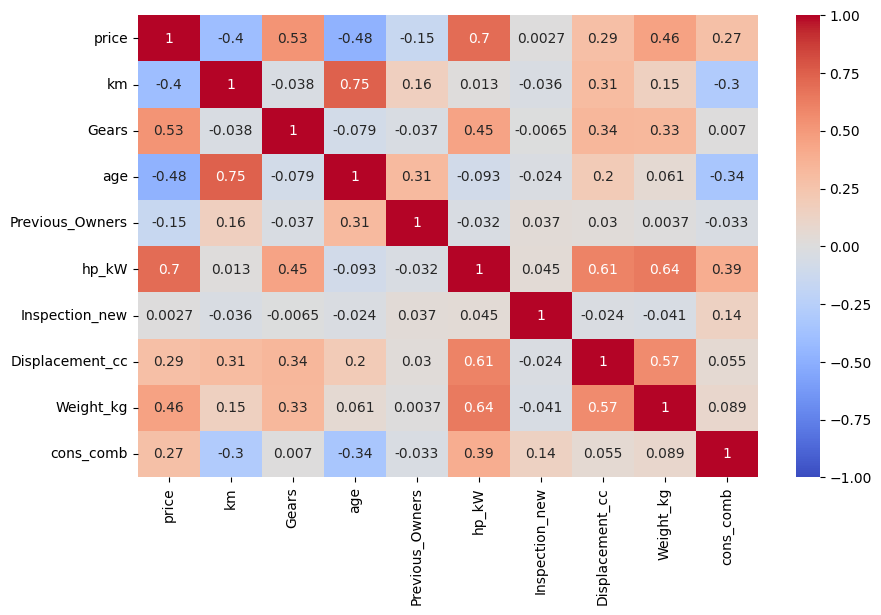

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");

<Axes: xlabel='make_model', ylabel='price'>

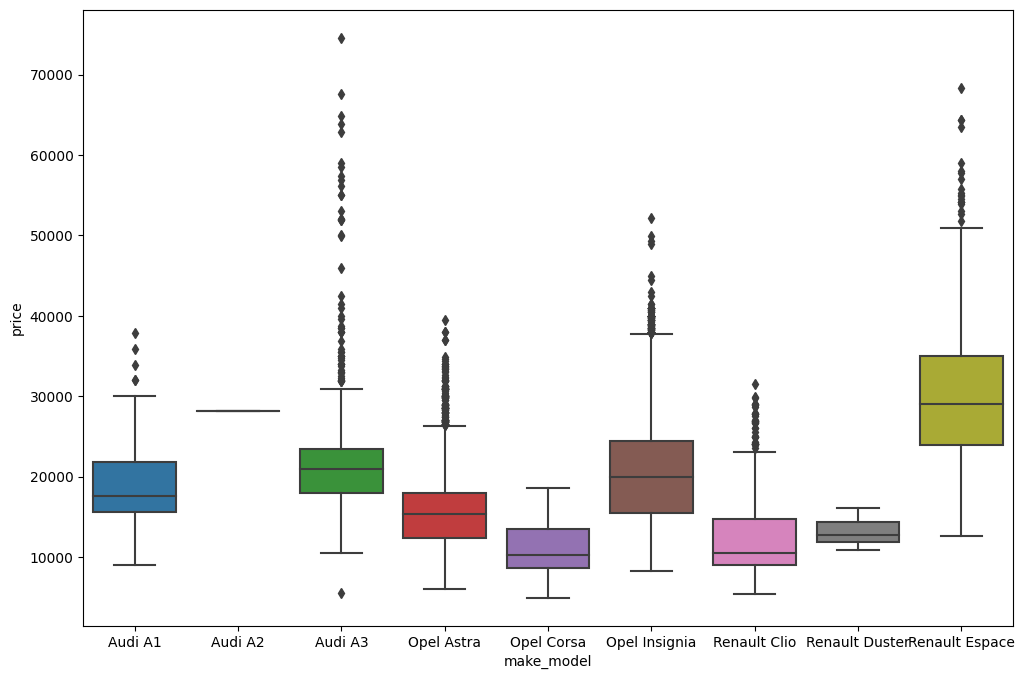

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,
                y="price",
                x="make_model",
               )

<Axes: xlabel='Inspection_new', ylabel='price'>

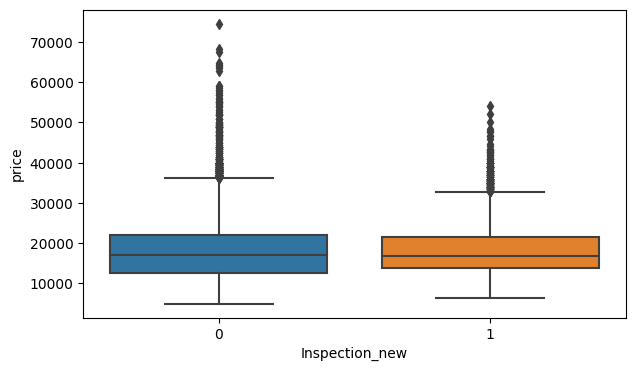

In [14]:
sns.boxplot(data=df,
                y="price",
                x="Inspection_new"
               )

In [15]:
df.Extras

0           Alloy wheels,Catalytic Converter,Voice Control
1        Alloy wheels,Sport seats,Sport suspension,Voic...
2                               Alloy wheels,Voice Control
3                   Alloy wheels,Sport seats,Voice Control
4        Alloy wheels,Sport package,Sport suspension,Vo...
                               ...                        
15907              Alloy wheels,Touch screen,Voice Control
15908                            Alloy wheels,Touch screen
15909    Alloy wheels,Catalytic Converter,Sport suspens...
15911              Alloy wheels,Touch screen,Voice Control
15912                                         Alloy wheels
Name: Extras, Length: 14242, dtype: object

In [16]:
df.Extras = df.Extras.apply(lambda x: len(x.split(',')))

In [17]:
from collections import Counter

def get_word_frequencies(column_data):
    # Concatenate all text in the column into a single string
    full_text = ' '.join(column_data.astype(str).tolist())

    # Tokenize the text into words (you might need a more advanced tokenizer based on your requirements)
    words = full_text.split(",")

    # Count the frequency of each word
    word_frequencies = Counter(words)

    return word_frequencies

# Example usage:
import pandas as pd



# Get word frequencies for the 'text_column'
word_frequencies = get_word_frequencies(df['Comfort_Convenience'])

# Print the unique words and their frequencies
for word, frequency in word_frequencies.items():
    print(f'{word}: {frequency}')

Air conditioning: 1
Armrest: 6916
Automatic climate control: 8384
Cruise control: 10065
Electrical side mirrors: 11225
Hill Holder: 6375
Leather steering wheel: 8861
Light sensor: 7334
Multi-function steering wheel: 10603
Navigation system: 7714
Park Distance Control: 9616
Parking assist system sensors rear: 9134
Power windows: 11244
Rain sensor: 7598
Seat heating: 5447
Start-stop system Air conditioning: 6986
Lumbar support: 3235
Start-stop system: 1150
Tinted windows Air conditioning: 1311
Parking assist system sensors front: 5736
Start-stop system Air suspension: 1
Auxiliary heating: 227
Heads-up display: 573
Split rear seats: 1638
Keyless central door lock: 2352
Power windows Air conditioning: 1885
Split rear seats Air conditioning: 664
Rain sensor Air conditioning: 616
Electrically heated windshield: 885
Seat ventilation: 740
Wind deflector Air conditioning: 39
Automatic climate control Air conditioning: 24
Tinted windows Leather steering wheel: 2
Start-stop system Armrest: 53
Sta

In [18]:
from collections import Counter

def get_word_frequencies(column_data):
    # Concatenate all text in the column into a single string
    full_text = ' '.join(column_data.astype(str).tolist())

    # Tokenize the text into words (you might need a more advanced tokenizer based on your requirements)
    words = full_text.split(",")

    # Count the frequency of each word
    word_frequencies = Counter(words)

    return word_frequencies

# Example usage:
import pandas as pd



# Get word frequencies for the 'text_column'
word_frequencies = get_word_frequencies(df['Entertainment_Media'])

# Print the unique words and their frequencies
for word, frequency in word_frequencies.items():
    print(f'{word}: {frequency}')

Bluetooth: 1
Hands-free equipment: 8933
On-board computer: 10118
Radio Bluetooth: 2814
Radio: 7647
Sound system MP3: 9
On-board computer Bluetooth: 548
CD player: 3959
MP3: 5577
Sound system: 1466
USB Bluetooth: 6570
USB CD player: 286
Radio Radio Radio Bluetooth: 16
USB Radio Bluetooth: 157
Digital radio: 1905
USB Radio: 24
Sound system Bluetooth: 376
USB Radio Radio Bluetooth: 18
Radio On-board computer: 206
Radio CD player: 209
Radio Radio Bluetooth: 100
CD player Bluetooth: 9
Radio Radio On-board computer: 9
Radio CD player CD player: 3
Radio MP3: 42
Radio CD player On-board computer: 1
USB On-board computer: 241
Sound system CD player Bluetooth: 2
On-board computer Hands-free equipment: 13
MP3 Bluetooth: 9
Sound system Radio Bluetooth: 16
USB Radio CD player: 11
Radio Radio CD player: 7
MP3 Hands-free equipment: 1
Sound system CD player: 25
On-board computer CD player: 28
Radio On-board computer Bluetooth: 60
USB On-board computer Bluetooth: 197
USB MP3: 50
Hands-free equipment Bl

In [19]:
from collections import Counter

def get_word_frequencies(column_data):
    # Concatenate all text in the column into a single string
    full_text = ' '.join(column_data.astype(str).tolist())

    # Tokenize the text into words (you might need a more advanced tokenizer based on your requirements)
    words = full_text.split(",")

    # Count the frequency of each word
    word_frequencies = Counter(words)

    return word_frequencies

# Example usage:
import pandas as pd



# Get word frequencies for the 'text_column'
word_frequencies = get_word_frequencies(df['Safety_Security'])

# Print the unique words and their frequencies
for word, frequency in word_frequencies.items():
    print(f'{word}: {frequency}')

ABS: 1
Central door lock: 11915
Daytime running lights: 10015
Driver-side airbag: 13385
Electronic stability control: 12597
Fog lights: 7954
Immobilizer: 10193
Isofix: 11209
Passenger-side airbag: 12979
Power steering: 12725
Side airbag: 11758
Tire pressure monitoring system: 9008
Traction control: 4071
Xenon headlights ABS: 3273
Central door lock with remote control: 2341
Head airbag: 2100
Traction control ABS: 6397
Alarm system: 1781
Driver drowsiness detection: 472
Emergency system: 1454
Tire pressure monitoring system ABS: 1170
LED Headlights: 2931
Adaptive headlights: 1942
Traction control Central door lock: 105
Side airbag ABS: 803
LED Daytime Running Lights: 5331
Xenon headlights Alarm system: 23
Rear airbag: 852
Power steering ABS: 261
Passenger-side airbag ABS: 37
Xenon headlights Central door lock: 66
Traction control Daytime running lights: 31
Emergency brake assistant: 3042
Tire pressure monitoring system Central door lock: 28
Adaptive Cruise Control: 1219
Night view assist

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14242 entries, 0 to 15912
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14242 non-null  object 
 1   body_type            14242 non-null  object 
 2   price                14242 non-null  int64  
 3   vat                  14242 non-null  object 
 4   km                   14242 non-null  float64
 5   Type                 14242 non-null  object 
 6   Fuel                 14242 non-null  object 
 7   Gears                14242 non-null  float64
 8   Comfort_Convenience  14242 non-null  object 
 9   Entertainment_Media  14242 non-null  object 
 10  Extras               14242 non-null  int64  
 11  Safety_Security      14242 non-null  object 
 12  age                  14242 non-null  float64
 13  Previous_Owners      14242 non-null  float64
 14  hp_kW                14242 non-null  float64
 15  Inspection_new       14242 non-null 

In [21]:
df.Entertainment_Media = df.Entertainment_Media.apply(lambda x: len(x.split(',')))

In [22]:
df.Safety_Security = df.Safety_Security.apply(lambda x: len(x.split(',')))

In [23]:
df.Comfort_Convenience = df.Comfort_Convenience.apply(lambda x: len(x.split(',')))

In [24]:
df.Comfort_Convenience

0        16
1         9
2        13
3        16
4        13
         ..
15907    27
15908    20
15909    26
15911    23
15912    24
Name: Comfort_Convenience, Length: 14242, dtype: int64

## VIF

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
# df_vif = df.copy()
# df_predictors = df.drop("sales", axis=1)
# predictors = df_predictors.columns

In [27]:
df.corr(numeric_only= True).columns.tolist()

['price',
 'km',
 'Gears',
 'Comfort_Convenience',
 'Entertainment_Media',
 'Extras',
 'Safety_Security',
 'age',
 'Previous_Owners',
 'hp_kW',
 'Inspection_new',
 'Displacement_cc',
 'Weight_kg',
 'cons_comb']

In [28]:
numeric_columns =  df.corr(numeric_only= True).columns.tolist()[1:]

In [29]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors

In [30]:
# Calculate VIF scores for each predictor
vif_data["VIF"] = [
    variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]

In [31]:
vif_data
# check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

,Variable,VIF
0,km,4.456
1,Gears,58.689
2,Comfort_Convenience,15.536
3,Entertainment_Media,10.633
4,Extras,5.812
5,Safety_Security,28.144
6,age,6.870
7,Previous_Owners,11.624
8,hp_kW,32.123
9,Inspection_new,1.466


In [32]:
numeric_columns.remove('Weight_kg')

In [33]:
numeric_columns

['km',
 'Gears',
 'Comfort_Convenience',
 'Entertainment_Media',
 'Extras',
 'Safety_Security',
 'age',
 'Previous_Owners',
 'hp_kW',
 'Inspection_new',
 'Displacement_cc',
 'cons_comb']

In [34]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors

In [35]:
# Calculate VIF scores for each predictor
vif_data["VIF"] = [
    variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]

In [36]:
vif_data
# check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

,Variable,VIF
0,km,4.445
1,Gears,47.889
2,Comfort_Convenience,15.504
3,Entertainment_Media,10.611
4,Extras,5.741
5,Safety_Security,28.122
6,age,6.856
7,Previous_Owners,11.528
8,hp_kW,30.060
9,Inspection_new,1.463


In [37]:
numeric_columns.remove('Displacement_cc')

In [38]:
vif_data

,Variable,VIF
0,km,4.445
1,Gears,47.889
2,Comfort_Convenience,15.504
3,Entertainment_Media,10.611
4,Extras,5.741
5,Safety_Security,28.122
6,age,6.856
7,Previous_Owners,11.528
8,hp_kW,30.060
9,Inspection_new,1.463


In [39]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors

vif_data["VIF"] = [
  variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]

In [40]:
vif_data

,Variable,VIF
0,km,4.237
1,Gears,38.419
2,Comfort_Convenience,15.350
3,Entertainment_Media,10.595
4,Extras,5.734
5,Safety_Security,27.709
6,age,6.812
7,Previous_Owners,11.499
8,hp_kW,23.435
9,Inspection_new,1.460


It seems we need to delete on more variable

In [41]:
numeric_columns.remove('cons_comb')

In [42]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors

vif_data["VIF"] = [
  variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]

In [43]:
vif_data

,Variable,VIF
0,km,4.201
1,Gears,31.002
2,Comfort_Convenience,14.867
3,Entertainment_Media,10.513
4,Extras,5.713
5,Safety_Security,26.267
6,age,6.736
7,Previous_Owners,10.895
8,hp_kW,20.625
9,Inspection_new,1.438


In [44]:
df.drop(["vat", "Displacement_cc"], axis = 1,inplace=True) # Husam's edit removed Displacement_cc
df

,make_model,body_type,price,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1220.000,front,3.800
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1255.000,front,5.600
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1135.000,front,3.800
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1195.000,front,3.800
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,Renault Espace,Van,39980,100.000,Pre-registered,Diesel,6.000,27,7,3,18,0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1734.000,front,4.700
15908,Renault Espace,Van,39950,1647.363,New,Diesel,6.000,20,6,2,19,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1758.000,front,5.300
15909,Renault Espace,Van,39950,1000.000,Demonstration,Benzine,6.000,26,7,5,19,0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1734.000,front,6.800
15911,Renault Espace,Van,39885,9900.000,Used,Benzine,7.000,23,5,3,19,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1708.000,front,7.400


## Encoding

In [45]:
df.describe(include="O").columns

Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

In [46]:
cat_onehot = ['make_model', 'body_type', 'Fuel', 'Upholstery_type', 'Gearing_Type', 'Drive_chain', 'Paint_Type']
cat_ordinal = ['Type']
cat_for_Type = ["Used", "New", "Pre-registered", "Employee's car", "Demonstration"]

In [47]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        (OrdinalEncoder(categories= [cat_for_Type],
                                       handle_unknown="use_encoded_value",
                                        unknown_value=-1) ,cat_ordinal),
                        remainder= StandardScaler(),
                         verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")

## Splitting the dataset

In [48]:
y = df.price
X = df.drop("price", axis=1)
print(y)
display(X)

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15907    39980
15908    39950
15909    39950
15911    39885
15912    39875
Name: price, Length: 14242, dtype: int64


,make_model,body_type,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1220.000,front,3.800
1,Audi A1,Sedans,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1255.000,front,5.600
2,Audi A1,Sedans,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1135.000,front,3.800
3,Audi A1,Sedans,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1195.000,front,3.800
4,Audi A1,Sedans,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,Renault Espace,Van,100.000,Pre-registered,Diesel,6.000,27,7,3,18,0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1734.000,front,4.700
15908,Renault Espace,Van,1647.363,New,Diesel,6.000,20,6,2,19,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1758.000,front,5.300
15909,Renault Espace,Van,1000.000,Demonstration,Benzine,6.000,26,7,5,19,0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1734.000,front,6.800
15911,Renault Espace,Van,9900.000,Used,Benzine,7.000,23,5,3,19,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1708.000,front,7.400


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.pipeline import Pipeline
operations = [("OneHot_Ordinal_Encoder", column_trans)]


pipe = Pipeline(steps=operations).set_output(transform="pandas")
X_train_transformed = pipe.fit_transform(X_train)
X_test_transformed = pipe.transform(X_test)

## Choose the best ML model using LazyPredcit

# Lazy Predcit

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.pipeline import Pipeline

In [ ]:
clf = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric=None)


#operations = [("OneHot_Ordinal_Encoder", column_trans)]

#LC_pipe = Pipeline(steps=operations).set_output(transform="pandas")

# X_train_transformed = LC_pipe.fit_transform(X_train)
# X_test_transformed = LC_pipe.transform(X_test)

# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

models,predictions = clf.fit(X_train_transformed, X_test_transformed, y_train, y_test)
models

  2%|▏         | 1/42 [00:05<03:33,  5.21s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7612252661309181, 'Adjusted R-Squared': 0.7573919222050856, 'RMSE': 3652.3188793166496, 'Time taken': 5.207090139389038}


  5%|▍         | 2/42 [00:07<02:21,  3.54s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9420480541731137, 'Adjusted R-Squared': 0.9411176804441769, 'RMSE': 1799.3204449754214, 'Time taken': 2.370471715927124}


  7%|▋         | 3/42 [00:07<01:19,  2.04s/it]

{'Model': 'BayesianRidge', 'R-Squared': 0.8557307978621529, 'Adjusted R-Squared': 0.8534146672534468, 'RMSE': 2838.9733672012894, 'Time taken': 0.2408592700958252}


 12%|█▏        | 5/42 [00:08<00:34,  1.06it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9030918851894087, 'Adjusted R-Squared': 0.9015361002566664, 'RMSE': 2326.776002264346, 'Time taken': 0.3690502643585205}
{'Model': 'DummyRegressor', 'R-Squared': -0.0005542520215129354, 'Adjusted R-Squared': -0.016617377722893067, 'RMSE': 7476.439517498171, 'Time taken': 0.1487741470336914}


 14%|█▍        | 6/42 [00:08<00:25,  1.44it/s]

{'Model': 'ElasticNet', 'R-Squared': 0.8215026632796364, 'Adjusted R-Squared': 0.8186370264075649, 'RMSE': 3157.84183284709, 'Time taken': 0.2062361240386963}


 17%|█▋        | 7/42 [00:09<00:25,  1.35it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.5218975183465009, 'Adjusted R-Squared': 0.5142219522835656, 'RMSE': 5168.148717822125, 'Time taken': 0.8227722644805908}


 19%|█▉        | 8/42 [00:09<00:21,  1.58it/s]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9018383819368205, 'Adjusted R-Squared': 0.9002624729775472, 'RMSE': 2341.7760371048394, 'Time taken': 0.3894069194793701}


 21%|██▏       | 9/42 [00:31<04:01,  7.33s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9472076154171822, 'Adjusted R-Squared': 0.9463600744588423, 'RMSE': 1717.3552533860761, 'Time taken': 22.040576696395874}


 24%|██▍       | 10/42 [00:32<02:45,  5.18s/it]

{'Model': 'GammaRegressor', 'R-Squared': 0.7922729435395004, 'Adjusted R-Squared': 0.7889380460936486, 'RMSE': 3406.599175133437, 'Time taken': 0.35630369186401367}


 26%|██▌       | 11/42 [01:55<15:04, 29.19s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -298.5628235883332, 'Adjusted R-Squared': -303.3720733426946, 'RMSE': 129365.49693104115, 'Time taken': 83.64180517196655}


 29%|██▊       | 12/42 [01:59<10:40, 21.36s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9200635218535733, 'Adjusted R-Squared': 0.9187802034388073, 'RMSE': 2113.2311727591364, 'Time taken': 3.4492156505584717}


 31%|███       | 13/42 [02:01<07:34, 15.68s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.94125192914478, 'Adjusted R-Squared': 0.9403087742434296, 'RMSE': 1811.6375274754962, 'Time taken': 2.616929292678833}


 33%|███▎      | 14/42 [02:02<05:08, 11.02s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8380865647104938, 'Adjusted R-Squared': 0.8354871695667093, 'RMSE': 3007.5714046287294, 'Time taken': 0.24776244163513184}


 36%|███▌      | 15/42 [02:02<03:30,  7.79s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8834634399757819, 'Adjusted R-Squared': 0.8815925355158855, 'RMSE': 2551.558914654454, 'Time taken': 0.28159117698669434}


 38%|███▊      | 16/42 [02:29<05:53, 13.61s/it]

{'Model': 'KernelRidge', 'R-Squared': -5.001959889922398, 'Adjusted R-Squared': -5.0983167201209385, 'RMSE': 18311.378840805384, 'Time taken': 27.118164777755737}
{'Model': 'Lars', 'R-Squared': -6024.045189007104, 'Adjusted R-Squared': -6120.772635851671, 'RMSE': 580169.1844762681, 'Time taken': 0.07265210151672363}


 43%|████▎     | 18/42 [02:29<02:57,  7.38s/it]

{'Model': 'LarsCV', 'R-Squared': -5640.95759264745, 'Adjusted R-Squared': -5731.534864024238, 'RMSE': 561421.9807797624, 'Time taken': 0.21749544143676758}


 45%|████▌     | 19/42 [02:30<02:11,  5.74s/it]

{'Model': 'Lasso', 'R-Squared': 0.8557342811832955, 'Adjusted R-Squared': 0.8534182064966199, 'RMSE': 2838.9390940664152, 'Time taken': 0.7520241737365723}


 48%|████▊     | 20/42 [02:31<01:36,  4.37s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8557984720242723, 'Adjusted R-Squared': 0.8534834278719684, 'RMSE': 2838.3074326948927, 'Time taken': 0.49146008491516113}
{'Model': 'LassoLars', 'R-Squared': 0.8552000341007016, 'Adjusted R-Squared': 0.8528753824897602, 'RMSE': 2844.190838461803, 'Time taken': 0.08093142509460449}


 55%|█████▍    | 23/42 [02:31<00:38,  2.00s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8552000341007016, 'Adjusted R-Squared': 0.8528753824897602, 'RMSE': 2844.190838461803, 'Time taken': 0.24306631088256836}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8552000341007011, 'Adjusted R-Squared': 0.8528753824897598, 'RMSE': 2844.190838461807, 'Time taken': 0.13536834716796875}


 57%|█████▋    | 24/42 [02:31<00:27,  1.53s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.8557145056189134, 'Adjusted R-Squared': 0.853398113450826, 'RMSE': 2839.1336645419506, 'Time taken': 0.10836958885192871}
{'Model': 'LinearSVR', 'R-Squared': -0.5579621267791606, 'Adjusted R-Squared': -0.5829740053753298, 'RMSE': 9329.383618697366, 'Time taken': 0.08086585998535156}


 62%|██████▏   | 26/42 [02:52<01:24,  5.26s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.7944092394174296, 'Adjusted R-Squared': 0.7911086385518513, 'RMSE': 3389.036919481683, 'Time taken': 20.850337266921997}


 69%|██████▉   | 29/42 [03:06<00:56,  4.32s/it]

{'Model': 'NuSVR', 'R-Squared': 0.04289610703025448, 'Adjusted R-Squared': 0.027530543282969888, 'RMSE': 7312.300739775221, 'Time taken': 13.29043984413147}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7475209639146018, 'Adjusted R-Squared': 0.7434676080017073, 'RMSE': 3755.6677521094603, 'Time taken': 0.04521584510803223}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.770589494391602, 'Adjusted R-Squared': 0.7669064859176891, 'RMSE': 3579.9845667256773, 'Time taken': 0.09296178817749023}


 71%|███████▏  | 30/42 [03:06<00:40,  3.41s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8342717614426813, 'Adjusted R-Squared': 0.8316111225789355, 'RMSE': 3042.7954671475422, 'Time taken': 0.1753072738647461}


 74%|███████▍  | 31/42 [03:06<00:30,  2.73s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.8899610322336307, 'Adjusted R-Squared': 0.8881944415987799, 'RMSE': 2479.4066247554247, 'Time taken': 0.5970678329467773}


 79%|███████▊  | 33/42 [03:07<00:15,  1.75s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -2.1871605471409345e+22, 'Adjusted R-Squared': -2.222273720391503e+22, 'RMSE': 1105388227614151.9, 'Time taken': 0.5806248188018799}


 81%|████████  | 34/42 [03:16<00:26,  3.28s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.946262256279932, 'Adjusted R-Squared': 0.9453995383108263, 'RMSE': 1732.6634623488278, 'Time taken': 8.555382013320923}
{'Model': 'Ridge', 'R-Squared': 0.855724723577521, 'Adjusted R-Squared': 0.8534084954508669, 'RMSE': 2839.0331323851456, 'Time taken': 0.07038307189941406}


 88%|████████▊ | 37/42 [03:16<00:08,  1.65s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.8557295729734584, 'Adjusted R-Squared': 0.8534134227001104, 'RMSE': 2838.985419042392, 'Time taken': 0.22661185264587402}
{'Model': 'SGDRegressor', 'R-Squared': -286531393.68555814, 'Adjusted R-Squared': -291131433.91418827, 'RMSE': 126520415.7141363, 'Time taken': 0.16634678840637207}


 90%|█████████ | 38/42 [03:32<00:20,  5.03s/it]

{'Model': 'SVR', 'R-Squared': 0.042165329839186194, 'Adjusted R-Squared': 0.026788034028541574, 'RMSE': 7315.091786291762, 'Time taken': 15.88302993774414}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8557145056189134, 'Adjusted R-Squared': 0.853398113450826, 'RMSE': 2839.1336645419506, 'Time taken': 0.07949566841125488}


 95%|█████████▌| 40/42 [03:32<00:06,  3.05s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.7783322623621659, 'Adjusted R-Squared': 0.7747735580476092, 'RMSE': 3519.05251432135, 'Time taken': 0.16456937789916992}


 98%|█████████▊| 41/42 [03:33<00:02,  2.48s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9438179342189731, 'Adjusted R-Squared': 0.9429159745471407, 'RMSE': 1771.6313441457942, 'Time taken': 0.515608549118042}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 11393, number of used features: 38
[LightGBM] [Info] Start training from score 18065.768893


100%|██████████| 42/42 [03:33<00:00,  5.09s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9420117101130784, 'Adjusted R-Squared': 0.9410807529083294, 'RMSE': 1799.884570645751, 'Time taken': 0.5420510768890381}


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.95,0.95,1717.36,22.04
RandomForestRegressor,0.95,0.95,1732.66,8.56
XGBRegressor,0.94,0.94,1771.63,0.52
BaggingRegressor,0.94,0.94,1799.32,2.37
LGBMRegressor,0.94,0.94,1799.88,0.54
...,...,...,...,...
GaussianProcessRegressor,-303.37,-298.56,129365.50,83.64
LarsCV,-5731.53,-5640.96,561421.98,0.22
Lars,-6120.77,-6024.05,580169.18,0.07


In [53]:
#Creating the eval function to see the metrics
def eval(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test_transformed)
    y_train_pred = model.predict(X_train_transformed)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}

    return pd.DataFrame(scores)

## RF Regrosser

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10,
                           n_estimators=100, max_depth=7)

rf.fit(X_train_transformed, y_train)

RandomForestRegressor(bootstrap=False, max_depth=7, max_features=0.5,
                      min_samples_leaf=3, min_samples_split=10)

In [54]:
eval(rf, X_train_transformed, y_train, X_test_transformed, y_test)

,train,test
R2,0.924,0.910
mae,1392.957,1467.307
mse,4168903.991,5020588.164
rmse,2041.789,2240.667


## Cross validation

In [55]:
scores = cross_validate(rf,
                        X_train_transformed,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [56]:
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.912
train_r2                                   0.925
test_neg_mean_absolute_error           -1459.523
train_neg_mean_absolute_error          -1385.092
test_neg_mean_squared_error         -4804155.548
train_neg_mean_squared_error        -4139772.542
test_neg_root_mean_squared_error       -2190.242
train_neg_root_mean_squared_error      -2034.554
dtype: float64

## GridSearch

In [57]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}

    return pd.DataFrame(scores)

In [58]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)

param_grid = {'RF_model__n_estimators':[50, 64, 128, 100],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[4, 7, 8, 10], #2, 3, 4,
             #'RF_model__min_samples_split':[2, 3,4],
             #'RF_model__min_samples_leaf': [2,3,4]
             #'RF_model__max_samples':[0.8, 1]
             }


grid_search = GridSearchCV(
pipe_model, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Fuel',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain',
                                                                          'Paint_Type']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     'New',
                                                                                                     'Pre-register...
                                                                                                     'Demonstration']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Type'])],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'RF_model__max_depth': [4, 7, 8, 10],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__n_estimators': [50, 64, 128, 100]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [59]:
train_val(grid_search, X_train, y_train, X_test, y_test)

,train,test
R2,0.945,0.919
mae,1207.283,1349.772
mse,3038533.209,4524752.627
rmse,1743.139,2127.147


## Build the model with best parameters

In [60]:
grid_search.best_params_

{'RF_model__max_depth': 10,
 'RF_model__max_features': 'sqrt',
 'RF_model__n_estimators': 128}

In [61]:
rf = RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=3, min_samples_split=10,
                           n_estimators=128, max_depth=10)

rf.fit(X_train_transformed, y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      min_samples_leaf=3, min_samples_split=10,
                      n_estimators=128)

In [62]:
eval(rf, X_train_transformed, y_train, X_test_transformed, y_test)

,train,test
R2,0.940,0.918
mae,1234.134,1353.168
mse,3289439.706,4596839.473
rmse,1813.681,2144.024


## Take the most important features

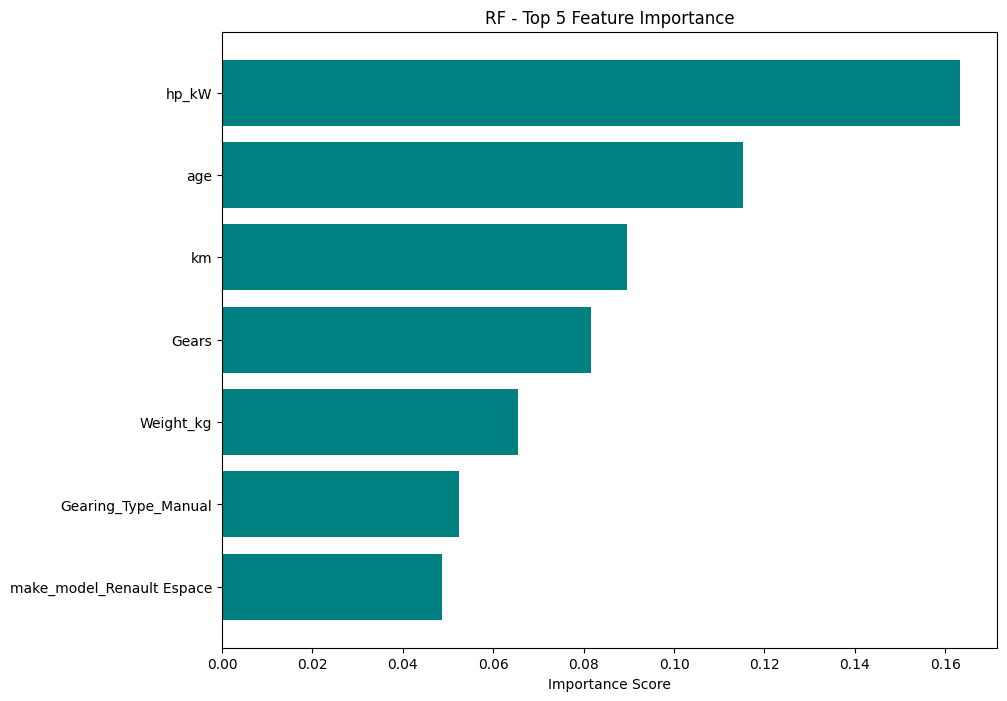

In [68]:
# Visualize feature importances
feature_importances = rf.feature_importances_
feature_names = X_train_transformed.columns  # Sort features based on importance
sorted_feature_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Extract feature names and their importance scores
features, importance = zip(*sorted_feature_importance)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[:7], importance[:7], color='teal')
plt.title('RF - Top 5 Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

## Splitting the data based on the most important features

In [64]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'Type', 'Fuel', 'Gears',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Weight_kg',
       'Drive_chain', 'cons_comb'],
      dtype='object')

In [69]:
X_new = df[['hp_kW', 'age', 'km', 'Gears', 'Weight_kg', 'Gearing_Type', 'make_model']]
y = df['price']

In [70]:
X_new.describe(include='O')

,Gearing_Type,make_model
count,14242,14242
unique,3,9
top,Manual,Audi A3
freq,7232,2758


In [71]:
cat_onehot = ['make_model', 'Gearing_Type']
# cat_ordinal = ['Type']

In [77]:
column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        remainder= StandardScaler(),
                         verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")

In [78]:
X_train_n, X_test_n, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [79]:
operations = [("OneHot_Ordinal_Encoder", column_trans)]


pipe = Pipeline(steps=operations).set_output(transform="pandas")
X_train_transformed = pipe.fit_transform(X_train_n)
X_test_transformed = pipe.transform(X_test_n)

In [80]:
rf = RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=3, min_samples_split=10,
                           n_estimators=128, max_depth=10)

# operations = [("encoder", column_trans), ("xgb", xgb)]
# pipe_model = Pipeline(steps=operations)

rf.fit(X_train_transformed, y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      min_samples_leaf=3, min_samples_split=10,
                      n_estimators=128)

In [82]:
eval(rf, X_train_transformed, y_train, X_test_transformed, y_test)

,train,test
R2,0.940,0.921
mae,1171.571,1276.641
mse,3281292.639,4385913.172
rmse,1811.434,2094.257


In [83]:
model = RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=3, min_samples_split=10,
                           n_estimators=128, max_depth=10)

operations = [("encoder", column_trans), ("rf", model)]
pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_new, y)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model',
                                                   'Gearing_Type'])],
                                   verbose_feature_names_out=False)),
                ('rf',
                 RandomForestRegressor(bootstrap=False, max_depth=10,
                                       max_features='sqrt', min_samples_leaf=3,
                                       min_samples_split=10,
                                       n_estimators=128))])

## Save the model

In [84]:
import pickle

In [86]:
filename = 'rf2_model'
pickle.dump(pipe_model, open(filename, 'wb'))
final_model = pickle.load(open('rf2_model', 'rb'))

In [87]:
X_new

,hp_kW,age,km,Gears,Weight_kg,Gearing_Type,make_model
0,66.000,3.000,56013.000,7.000,1220.000,Automatic,Audi A1
1,141.000,2.000,80000.000,7.000,1255.000,Automatic,Audi A1
2,85.000,3.000,83450.000,7.000,1135.000,Automatic,Audi A1
3,66.000,3.000,73000.000,6.000,1195.000,Automatic,Audi A1
4,66.000,3.000,16200.000,7.000,1135.000,Automatic,Audi A1
...,...,...,...,...,...,...,...
15907,118.000,0.000,100.000,6.000,1734.000,Automatic,Renault Espace
15908,147.000,0.000,1647.363,6.000,1758.000,Automatic,Renault Espace
15909,165.000,0.000,1000.000,6.000,1734.000,Automatic,Renault Espace
15911,165.000,0.000,9900.000,7.000,1708.000,Automatic,Renault Espace


In [93]:
my_dict = {
    "age": 3,
    "hp_kW": 77,
    "km": 57893.000,
    "Gears": 7,
    "Weight_kg": 1498.000,
    'Gearing_Type':'Automatic',
    "make_model": 'Audi A1'
}

In [94]:
df = pd.DataFrame.from_dict([my_dict])

In [95]:
df

,age,hp_kW,km,Gears,Weight_kg,Gearing_Type,make_model
0,3,77,57893.000,7,1498.000,Automatic,Audi A1


In [101]:
X_new.Weight_kg.min()

840.0

In [102]:
X_new.Weight_kg.max()

2471.0

In [96]:
prediction = final_model.predict(df)
print(prediction)

[16786.03200219]
